In [1]:
# call matplotlib interactive plotting
%matplotlib notebook

In [2]:
# import libraries
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# pull in csv to pandas df

clinical_trial_data = pd.read_csv("../data/clinicaltrial_data.csv")
mouse_drug_data = pd.read_csv("../data/mouse_drug_data.csv")

In [4]:
# explore df...

clinical_trial_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
mouse_drug_data.count()

Mouse ID    250
Drug        250
dtype: int64

In [6]:
clinical_trial_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [7]:
mouse_drug_data.head(10)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
5,o848,Stelasyn
6,z314,Stelasyn
7,g989,Stelasyn
8,m269,Stelasyn
9,a963,Stelasyn


In [8]:
merged_df = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on="Mouse ID")

In [9]:
merged_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [10]:
mouseIdGroup = merged_df.groupby("Mouse ID")
mouseIdGroup.size().sort_values(ascending=False)

Mouse ID
g989    26
l661    10
l471    10
k894    10
k862    10
        ..
u153     1
t573     1
x336     1
f932     1
n482     1
Length: 249, dtype: int64

In [11]:
mouseIdGroup.size().unique()

array([10,  7,  3,  6,  1,  2,  9,  4,  8,  5, 26], dtype=int64)

In [12]:
merged_df.groupby(['Drug']).agg(['min','max','count','nunique'])


Mouse ID                     Timepoint                    \
               min   max count nunique       min max count nunique   
Drug                                                                 
Capomulin     b128  y793   230      25         0  45   230      10   
Ceftamin      a275  y865   178      25         0  45   178      10   
Infubinol     a203  z581   178      25         0  45   178      10   
Ketapril      a457  y260   188      25         0  45   188      10   
Naftisol      a818  z969   186      25         0  45   186      10   
Placebo       a262  y478   181      25         0  45   181      10   
Propriva      a699  z435   161      25         0  45   161      10   
Ramicane      a411  z578   228      25         0  45   228      10   
Stelasyn      a366  z314   194      25         0  45   194      10   
Zoniferol     a401  x613   182      25         0  45   182      10   

          Tumor Volume (mm3)                          Metastatic Sites      \
                         min        max count nunique              min max   
Drug                                                                         
Capomulin          23.343598  48.158209   230     206                0   3   
Ceftamin           45.000000  68.923185   178     154                0   4   
Infubinol          45.000000  72.226731   178     154                0   4   
Ketapril           45.000000  78.567014   188     164                0   4   
Naftisol           45.000000  76.668817   186     162                0   4   
Placebo            45.000000  73.212939   181     157                0   4   
Propriva           45.000000  72.455421   161     136                0   4   
Ramicane           22.050126  47.622816   228     204                0   3   
Stelasyn           45.000000  75.123690   194     169                0   4   
Zoniferol          45.000000  73.324432   182     158                0   4   

                         
          count nunique  
Drug                     
Capomulin   230       4  
Ceftamin    178       5  
Infubinol   178       5  
Ketapril    188       5  
Naftisol    186       5  
Placebo     181       5  
Propriva    161       5  
Ramicane    228       4  
Stelasyn    194       5  
Zoniferol   182       5

In [13]:
mouseIdDrugGroup = merged_df.groupby(["Mouse ID", "Drug"])
mouseIdDrugGroup.size().sort_values(ascending=False)

Mouse ID  Drug     
g989      Stelasyn     13
          Propriva     13
p438      Ceftamin     10
j755      Naftisol     10
k862      Stelasyn     10
                       ..
n482      Propriva      1
d133      Zoniferol     1
h428      Ketapril      1
f932      Ketapril      1
t573      Ceftamin      1
Length: 250, dtype: int64

In [14]:
mouseIdDrugGroup.agg("max")

,,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,Drug,,,
a203,Infubinol,45,67.973419,2
a251,Infubinol,45,65.525743,1
a262,Placebo,45,70.717621,4
a275,Ceftamin,45,62.999356,3
a366,Stelasyn,30,63.440686,1
...,...,...,...,...
z435,Propriva,10,48.710661,0
z578,Ramicane,45,45.000000,0
z581,Infubinol,45,62.754451,3


In [15]:
# begin to analyse tumor response to treatment by utilizing groupby to isolate the tumor volume by drug and timepoint

drugTimeTumorGroup = merged_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]

In [16]:
# aggregrate the mean volume of the tumor by drug and timepount and set to a new df

mean_tumor_vol = drugTimeTumorGroup.mean()
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)
mean_tumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [17]:
# calculate standard error of the tumor volume mean

sem_tumor = drugTimeTumorGroup.sem()
sem_tumor_df = pd.DataFrame(sem_tumor)
sem_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

<IPython.core.display.Javascript object>


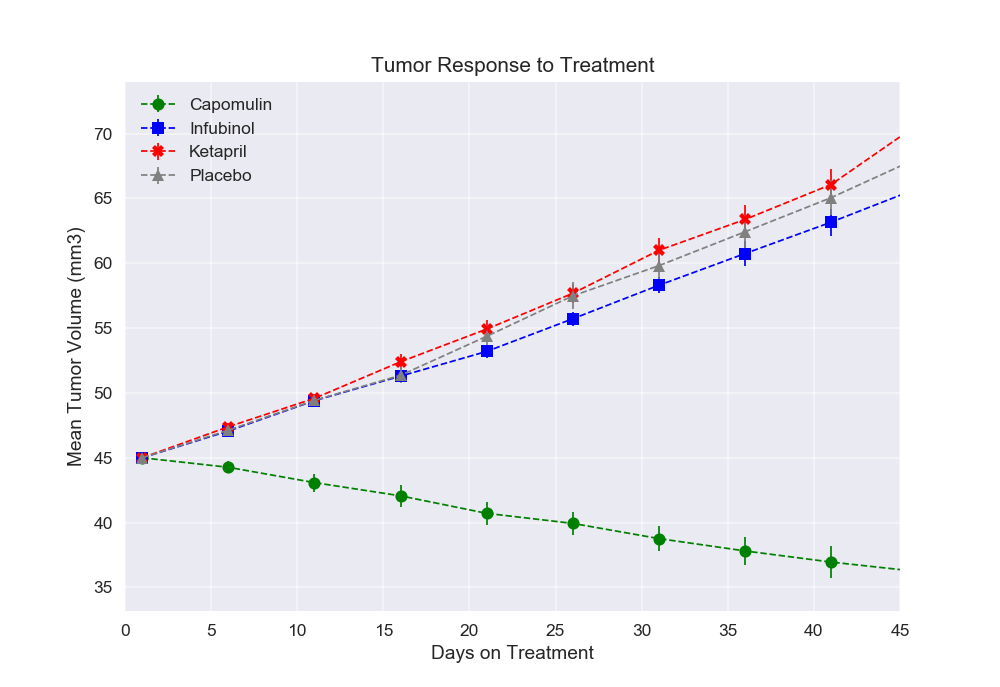

In [18]:
# plot the results

fig, ax = plt.subplots()

ax.errorbar(np.arange(1, 50, 5), mean_tumor_vol.loc["Capomulin", "Tumor Volume (mm3)"], yerr = sem_tumor_df.loc["Capomulin","Tumor Volume (mm3)"], fmt="o--", linewidth = 1, color="green", label="Capomulin")
ax.errorbar(np.arange(1, 50, 5), mean_tumor_vol.loc["Infubinol", "Tumor Volume (mm3)"], yerr = sem_tumor_df.loc["Infubinol","Tumor Volume (mm3)"], fmt="s--", linewidth = 1, color ="blue", label="Infubinol")
ax.errorbar(np.arange(1, 50, 5), mean_tumor_vol.loc["Ketapril", "Tumor Volume (mm3)"], yerr = sem_tumor_df.loc["Ketapril","Tumor Volume (mm3)"], fmt="X--", linewidth = 1, color="red", label="Ketapril")
ax.errorbar(np.arange(1, 50, 5), mean_tumor_vol.loc["Placebo", "Tumor Volume (mm3)"], yerr = sem_tumor_df.loc["Placebo","Tumor Volume (mm3)"], fmt="^--", linewidth = 1, color="grey", label="Placebo")

ax.set_xlim(0, 45, 5)
ax.legend(loc="best")
ax.grid(alpha = 0.5)
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Days on Treatment")
ax.set_ylabel("Mean Tumor Volume (mm3)")
plt.savefig("TumorResponseLineGraph", bbox_inches = "tight")


In [19]:
# begin to analyse metastatic site response to treatment by utilizing groupby to isolate the mean site counts by drug and timepoint

drugTimeMetastaticGroup = merged_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
mean_sites = drugTimeMetastaticGroup.mean()
sites_df = pd.DataFrame(mean_sites)
sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [20]:
# get the standard error for the site means

sem_meta = drugTimeMetastaticGroup.sem()
sem_meta_df = pd.DataFrame(sem_meta)
sem_meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

<IPython.core.display.Javascript object>


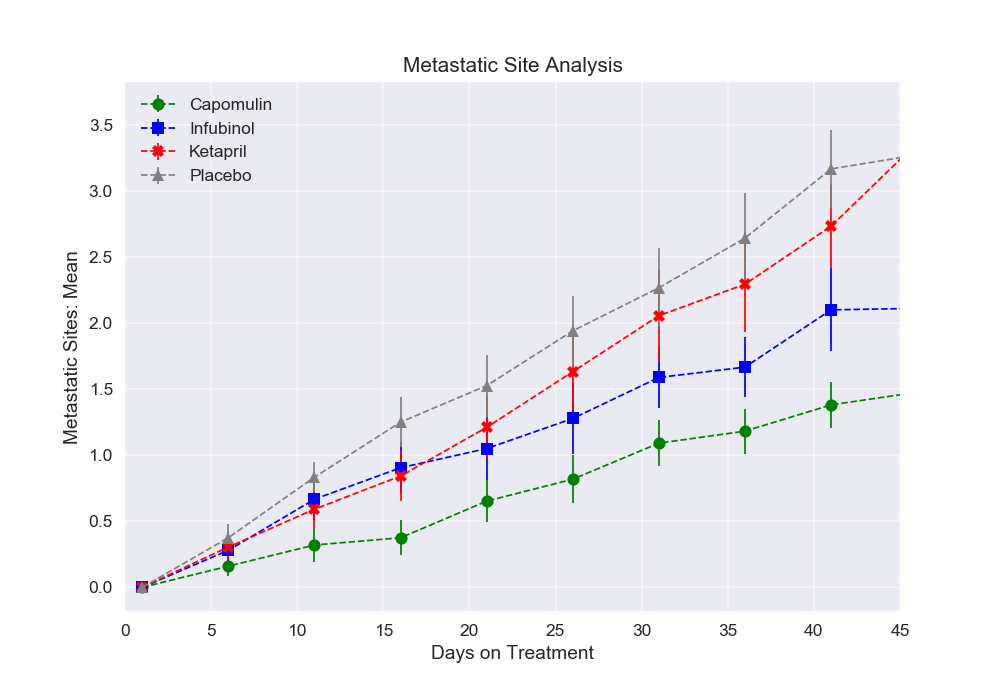

In [21]:
# plot

fig2, ax2 = plt.subplots()

ax2.errorbar(np.arange(1, 50, 5), sites_df.loc["Capomulin", "Metastatic Sites"], yerr = sem_meta_df.loc["Capomulin","Metastatic Sites"], fmt="o--", linewidth = 1, color="green", label="Capomulin")
ax2.errorbar(np.arange(1, 50, 5), sites_df.loc["Infubinol", "Metastatic Sites"], yerr = sem_meta_df.loc["Infubinol","Metastatic Sites"], fmt="s--", linewidth = 1, color ="blue", label="Infubinol")
ax2.errorbar(np.arange(1, 50, 5), sites_df.loc["Ketapril", "Metastatic Sites"], yerr = sem_meta_df.loc["Ketapril","Metastatic Sites"], fmt="X--", linewidth = 1, color="red", label="Ketapril")
ax2.errorbar(np.arange(1, 50, 5), sites_df.loc["Placebo", "Metastatic Sites"], yerr = sem_meta_df.loc["Placebo","Metastatic Sites"], fmt="^--", linewidth = 1, color="grey", label="Placebo")

ax2.set_xlim(0, 45, 5)
ax2.legend(loc="best")
ax2.grid(alpha = 0.5)
ax2.set_title("Metastatic Site Analysis")
ax2.set_xlabel("Days on Treatment")
ax2.set_ylabel("Metastatic Sites: Mean")
plt.savefig("MetastaticSiteLineGraph", bbox_inches = "tight")


In [22]:
# to calculate survival rates by drug group the ID's by drug and timepoint and use the count function to track loss of mice

groupby_drugtime_mouse = merged_df.groupby(["Drug", "Timepoint"])["Mouse ID"]

mouse_counts = groupby_drugtime_mouse.count()
mouse_counts_df = pd.DataFrame(mouse_counts)
reset_mice = mouse_counts_df.rename(columns={"Mouse ID": "Total Mice"})

reset_mice.head()

Total Mice
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

<IPython.core.display.Javascript object>


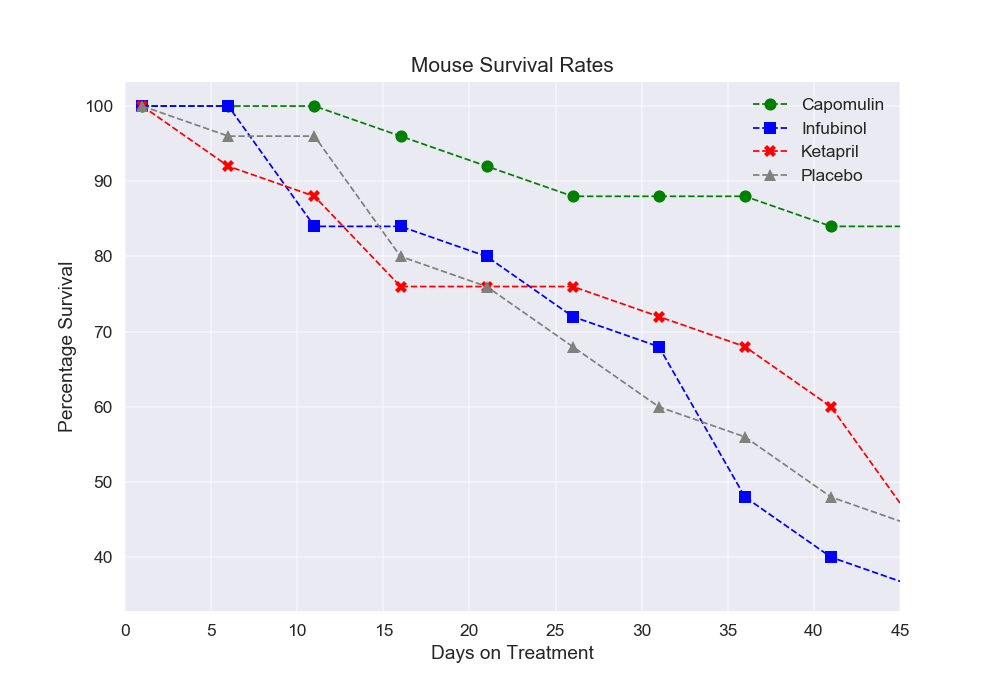

In [23]:
# plot it 

fig3, ax3 = plt.subplots()

ax3.plot(np.arange(1, 50, 5), 100*reset_mice.loc["Capomulin", "Total Mice"]/25, marker="o", linestyle="--", linewidth = 1, color="green", label="Capomulin")
ax3.plot(np.arange(1, 50, 5), 100*reset_mice.loc["Infubinol", "Total Mice"]/25, marker="s", linestyle="--", linewidth = 1, color ="blue", label="Infubinol")
ax3.plot(np.arange(1, 50, 5), 100*reset_mice.loc["Ketapril", "Total Mice"]/25, marker="X", linestyle="--", linewidth = 1, color="red", label="Ketapril")
ax3.plot(np.arange(1, 50, 5), 100*reset_mice.loc["Placebo", "Total Mice"]/25, marker="^", linestyle="--", linewidth = 1, color="grey", label="Placebo")

ax3.legend(loc="best")
ax3.grid(alpha = 0.5)
ax3.set_xlim(0,45,5)
ax3.set_title("Mouse Survival Rates")
ax3.set_xlabel("Days on Treatment")
ax3.set_ylabel("Percentage Survival")
plt.savefig("MouseSurvivalRateLineGraph", bbox_inches = "tight")



In [24]:
# get an analysis of tumor size by pivoting the mean tumor volume df at timepoint(y) & drug(x)

reset_tumor_df = mean_tumor_vol.reset_index()
reset_tumor_df.head()
tumor_pivot = reset_tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumor_pivot.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [25]:
# calculate the total % change using iloc pandas function to divide the last column from the first

percent_changes = (tumor_pivot.iloc[-1]/(tumor_pivot.iloc[0])-1)*100
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [26]:
# utilize found code to get good labels for graph
#  http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        # Just print the percentage in the center of the bar
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha='center', va='bottom', color = 'w', size = 10)

<IPython.core.display.Javascript object>


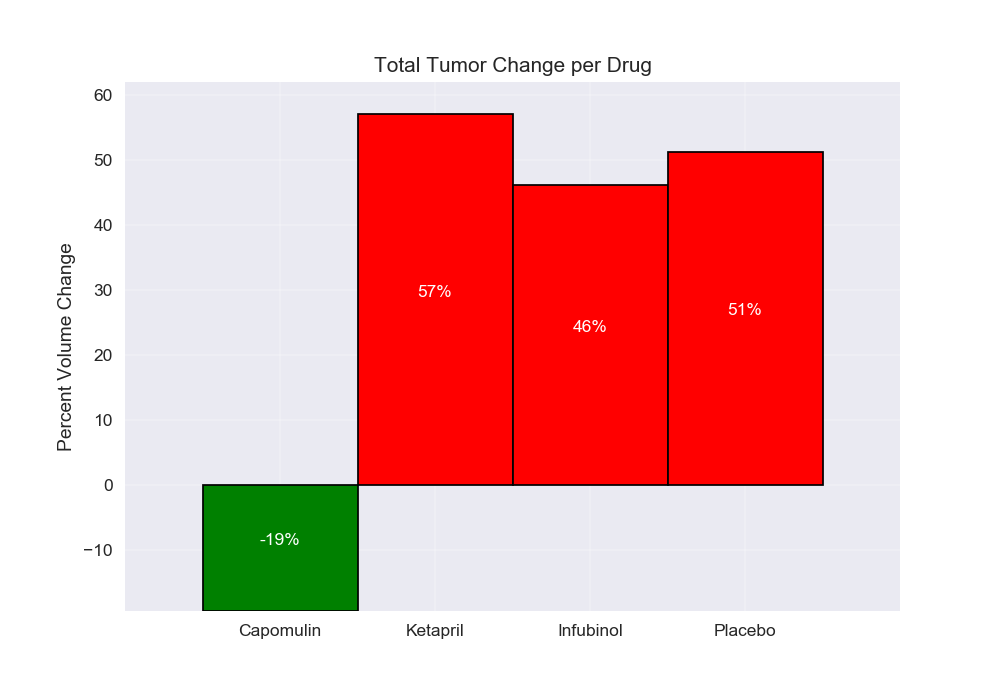

In [27]:
# plot it!

fig4, ax4 = plt.subplots()

x_axis = np.arange(0,4,1)
bars = [percent_changes["Capomulin"], percent_changes["Ketapril"], percent_changes["Infubinol"], percent_changes["Placebo"]]
labels = ["Capomulin", "Ketapril", "Infubinol", "Placebo"]
colors = []

for p in percent_changes:
    if p >= 0:
        colors.append("r")
    else:
        colors.append("g")

barplot = ax4.bar(x_axis, bars, width=1, align="center", color= colors, edgecolor = "black", linewidth= 1, tick_label =labels)

ax4.grid(alpha= 0.25)
ax4.set_xlim(-1, 4)
ax4.set_ylim(min(bars), max(bars)+5)
ax4.set_title("Total Tumor Change per Drug")
ax4.set_ylabel("Percent Volume Change")

autolabel(barplot, ax4)
plt.show()
plt.savefig("TumorResponseBarGraph", bbox_inches = "tight")

